## **EDA (Exploratory Data Analysis)**

In [1]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import nltk
import regex as re
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as stopword
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Impore Dataset

data_df = pd.read_csv('/content/train_preprocess.tsv.txt', names = ['Text','Sentiment'], sep = '\t')
data_df.drop_duplicates()

,Text,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       11000 non-null  object
 1   Sentiment  11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [7]:
data_df.describe()

,Text,Sentiment
count,11000,11000
unique,10933,3
top,kesal,positive
freq,4,6416


In [8]:
data_df['Sentiment'].value_counts()

Sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

In [9]:
## Data Word Length

data_df['Word Length'] = data_df['Text'].apply((lambda word: len(word.split())))

In [10]:
data_df.head()

,Text,Sentiment,Word Length
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38


In [11]:
## Average Text Length

print("Average Text Length ==>", data_df['Word Length'].mean())
print("Median Text Length ==>", data_df['Word Length'].median())

Average Text Length ==> 32.93127272727273
Median Text Length ==> 28.0


Text(0.5, 0, 'Words')

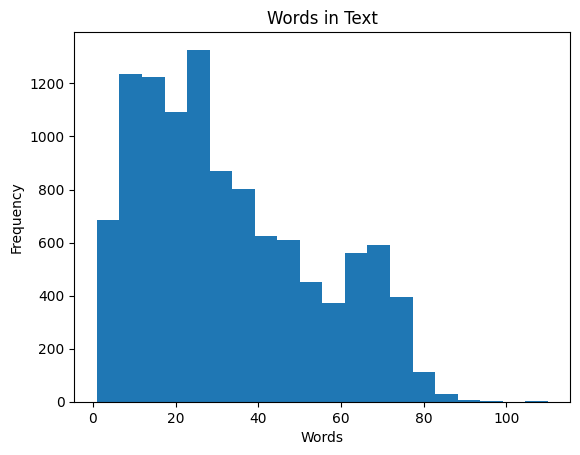

In [12]:
## Word Length Distribution on Data Train

from matplotlib import pyplot as plt

data_df['Word Length'].plot(kind='hist', bins=20, title='Words in Text')
plt.xlabel('Words')

Text(0.5, 1.0, 'Sentiment')

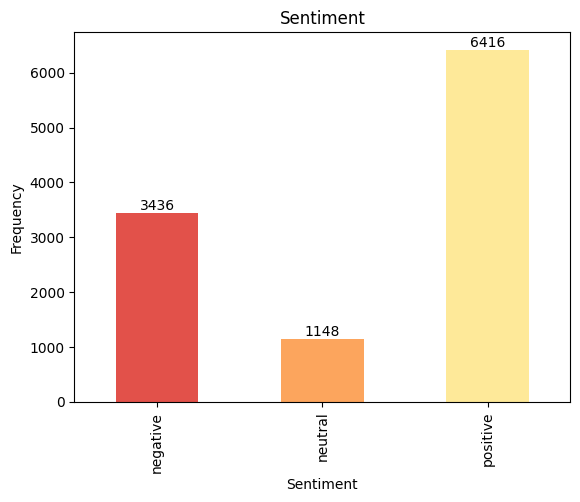

In [13]:
## Sentiment from data_train

ax = data_df.groupby('Sentiment').size().plot(kind='bar', color=sns.palettes.mpl_palette('Spectral'))
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylabel("Frequency")
plt.title("Sentiment")

## **Text Cleansing**

In [15]:
## Dict for Kata Alay
kamusalay_df = pd.read_csv('/content/new_kamusalay.csv', names = ['ALAY', 'TIDAK_ALAY'], encoding = 'latin1')
dict_alay = {
    'ALAY':[],
    'TIDAK_ALAY':[]
}
for i in kamusalay_df.itertuples():
  dict_alay['ALAY'].append(i.ALAY)
  dict_alay['TIDAK_ALAY'].append(i.TIDAK_ALAY)

In [16]:
## Text Cleansing

## REGEX FUNCTION Cleansing

# 1. remove USER,RT,URL
def remove_user_rt_url (str):
    string = re.sub(r'USER|\bRT\b|URL',' ',str)
    return string

#2 buat lower case
def lower_case (str):
    string = str.lower()
    return string

#3 remove /n
def remove_n (str):
    string =  re.sub(r'\\n',' ',str)
    return string

#4 remove emoji
def remove_emo2 (str):
    pattern = re.compile(r'[\\x]+[a-z0-9]{2}')
    string = re.sub(pattern,'',str)
    return string

#5 Remove Link
# remove link (http|https)
def remove_link (str):
    pattern = re.compile(r'www\S+|http\S+')
    string =  re.sub(pattern,' ',str)
    return string

#6 Hapus sisa karakter
# hapus special character dan pertahankan angka dan number
def remove_character(str):
    string = re.sub(r'[^a-zA-Z]+',' ',str)
    return string

#8 repalce alay
def replace_alay(str):
    for i in range(0,len(kamusalay_df)-1):
        alay = dict_alay['ALAY'][i]
        if (' ' + alay + ' ') in (' ' + str + ' '):
            replace = dict_alay['TIDAK_ALAY'][i]
            str = re.sub(r'\b{}\b'.format(alay),replace,str)
    return str

#9 remove extra space
def remove_extra_space (str):
    str = re.sub('  +', ' ', str)
    str = str.strip()
    return str

def regex_cleansing(str):
    str = remove_user_rt_url (str)
    str = lower_case (str)
    str = remove_n (str)
    str = remove_emo2 (str)
    str = remove_link (str)
    str = remove_character(str)
    str = remove_extra_space (str)
    str = replace_alay(str)
    str = remove_extra_space (str)
    return str


In [17]:
data_df['Text_Cleansing'] = data_df['Text'].apply(regex_cleansing)
data_df = data_df[['Text','Text_Cleansing','Sentiment']]
data_df.head()

,Text,Text_Cleansing,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k mmbri hujjah partai ap...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unbog paket d...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,negative


## **Text Preprocessing**

In [18]:
## Preprocessing Text

factory = StemmerFactory()
stemer = factory.create_stemmer()

list_stopwords_id = stopword.words('indonesian')
list_stopwords_en = stopword.words('english')

list_stopwords_id.extend(list_stopwords_en)
list_stopwords_id.extend(['ya', 'yg', 'ga', 'yuk', 'dah','nya','duh','sih'])

# not_stopwords = {'enggak', 'tidak'}
# list_stopwords_id = set([word for word in list_stopwords_id if word not in not_stopwords])

#1 Tokenisasi
def tokenize (text):
  token = word_tokenize(text)
  return token

#2 StopWord removal
def stop_words(text):
  after_stopwords = [word for word in text if not word in list_stopwords_id]
  return after_stopwords

#3 Stemming
def stemming (text):
  after_stemming = [stemer.stem(word) for word in text]
  return after_stemming

#4 Token to sentence
def sentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

def preprocesing(text):
  text = tokenize(text)
  text = stop_words(text)
  text = stemming(text)
  text = sentence(text)
  return text

In [19]:
data_df['Text_Preprocessing'] = data_df['Text_Cleansing'].apply(preprocesing)
data_df = data_df[['Text','Text_Cleansing','Text_Preprocessing','Sentiment']]
data_df.head()

,Text,Text_Cleansing,Text_Preprocessing,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus k mmbri hujjah partai diwlh ...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatra bandung temp...,lokasi strategis jalan sumatra bandung nyaman ...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unbog paket d...,betapa bahagia unbog paket barang bagus tetap ...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh jadi mahasiswa jangan sombong dong kasih ...,aduh mahasiswa sombong kasih kartu kuning ajar...,negative


In [20]:
def convert_text_to_word(data):
  list_words=''
  for text in data_negative:
      for word in text:
          list_words += ''+(word)
  return list_words

## **WORD CLOUD By Sentiment**

In [21]:
data_positive = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'positive']
data_negative = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'negative']
data_neutral = data_df['Text_Preprocessing'].loc[data_df['Sentiment'] == 'neutral']

In [22]:
list_word_positive = convert_text_to_word(data_positive)
list_word_negative = convert_text_to_word(data_negative)
list_word_neutral = convert_text_to_word(data_neutral)

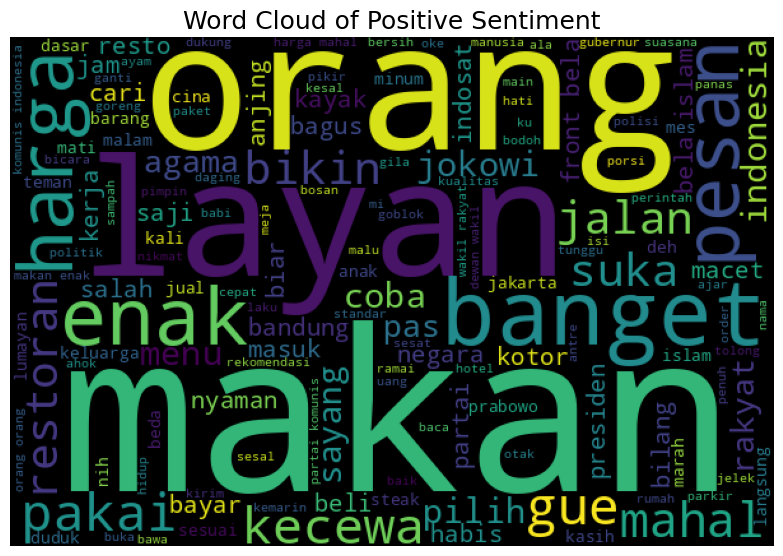

In [23]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_positive)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Positive Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

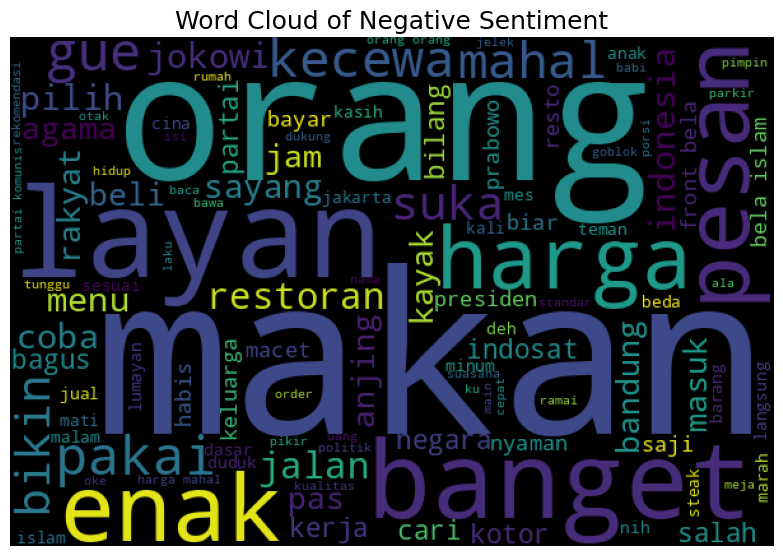

In [24]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_negative)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Negative Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

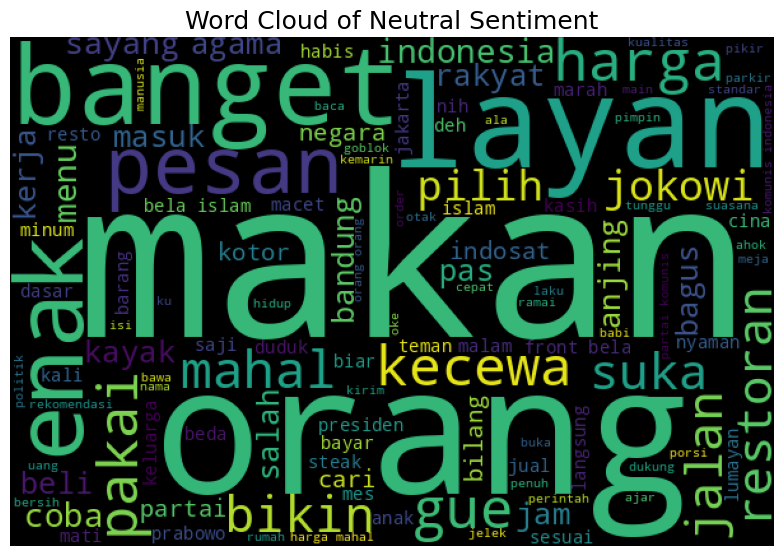

In [25]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_word_neutral)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Neutral Sentiment', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()